# **K-Nearest Neighbors (KNN) for Wine Classification**

This notebook presents a K-Nearest Neighbors (KNN) algorithm for wine classification using a comprehensive wine dataset. The script leverages the scikit-learn library for dataset manipulation, splitting, and evaluation.

The wine dataset is visualized using a scatter plot to showcase the distribution of classes. The colors represent different wine classes, offering a visual understanding of the dataset's structure.

The KNN algorithm is implemented with a focus on flexibility and simplicity. It includes functions for calculating Euclidean distance, making single point predictions, and predicting multiple points. The algorithm's performance is tested on the validation and test datasets for different numbers of nearest neighbors (k).

The accuracy of the KNN model is assessed using a confusion matrix and a classification report. The notebook explores the impact of varying the number of neighbors on model accuracy, providing insights into the optimal k value for this specific dataset.

Note: Ensure that the required libraries are installed, and the paths to the dataset files are correctly specified before running the notebook.

# **Importing**

## Libraries

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

from statistics import mode

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import classification_report
import seaborn as sns

## Dataset

In [ ]:
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [ ]:
train_dataset = pd.read_csv("/drive/My Drive/Colab Notebooks/Wine dataset/train.csv")
test_dataset = pd.read_csv("/drive/My Drive/Colab Notebooks/Wine dataset/test.csv")
validation_dataset = pd.read_csv("/drive/My Drive/Colab Notebooks/Wine dataset/validation.csv")
complete = pd.read_csv("/drive/My Drive/Colab Notebooks/Wine dataset/complete.csv")

In [ ]:
train_dataset

,Unnamed: 0,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,115,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495
1,168,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
2,38,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
3,41,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
4,29,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,89,2,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
120,39,1,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
121,7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
122,60,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450


In [ ]:
X_train = train_dataset
y_train = X_train.pop('class')
X_test = test_dataset
y_test = X_test.pop('class')

In [ ]:
#complete_wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")

In [ ]:
#columns = ["class", "Alcohol", "Malic acid", "Ash",	"Alcalinity of ash", "Magnesium",	"Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",	"OD280/OD315 of diluted wines",	"Proline"]

#complete_wine_data.columns = columns

In [ ]:
#complete_wine_data

In [ ]:
#X = complete_wine_data
#y = X.pop("class")

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2, random_state=0)

# **Presenting data**

In [ ]:
X = complete
y = X.pop('class')

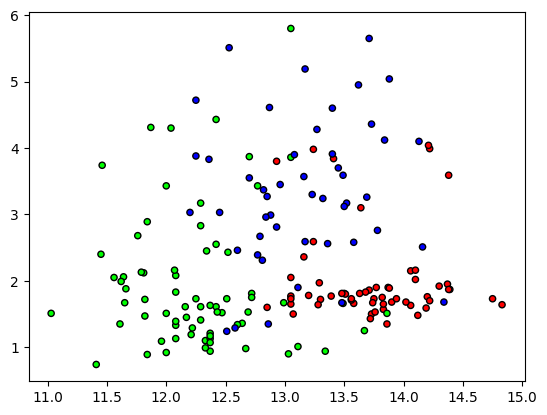

In [ ]:
cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

# **Algorithm implementation**

## Defining distance (Eucledian)

In [ ]:
def eucledian_distnce(a, b):
  return np.sqrt(np.sum(a-b)**2)

## One point prediction

In [ ]:
def single_predict(point, k):

  distance = []

  for ind in X_train.index:
    for point_feature in point:
      distances = [eucledian_distnce(point_feature, x_train) for x_train in X_train.loc[ind]]
    distance.append(sum(distances))

  all_distance = pd.Series(distance, X_train.index)
  k_indices = all_distance.sort_values()[:k].index
  k_nearest_classes = [y_train[i] for i in k_indices]

  return mode(k_nearest_classes)

## Multiple prediction

In [ ]:
def multiple_predict(data, k):
  predicted_labels = [single_predict(data_point, k) for data_point in data]
  return predicted_labels

# **Testing algorythm**

## Testing for 5 near neighbors on validation data

---



In [ ]:
predictions = multiple_predict(X_test.to_numpy(), 18)

In [ ]:
accurance = np.sum(predictions == y_test.values) / len(y_test.values)

print(f"Accurance for 5 neighbours: {accurance:.2%}")

Accurance for 5 neighbours: 58.33%


In [ ]:
def comp_confmat(actual, predicted):

    classes = np.unique(actual)

    confmat = np.zeros((len(classes), len(classes)))

    for i in range(len(classes)):
        for j in range(len(classes)):

           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

In [ ]:
con_matrix = comp_confmat(predictions, y_test)

In [ ]:
con_matrix

array([[ 7.,  0.,  0.],
       [ 0.,  2.,  0.],
       [ 4., 11., 12.]])

Text(0.5, 1.0, 'Model Accuracy Score: 58.33%')

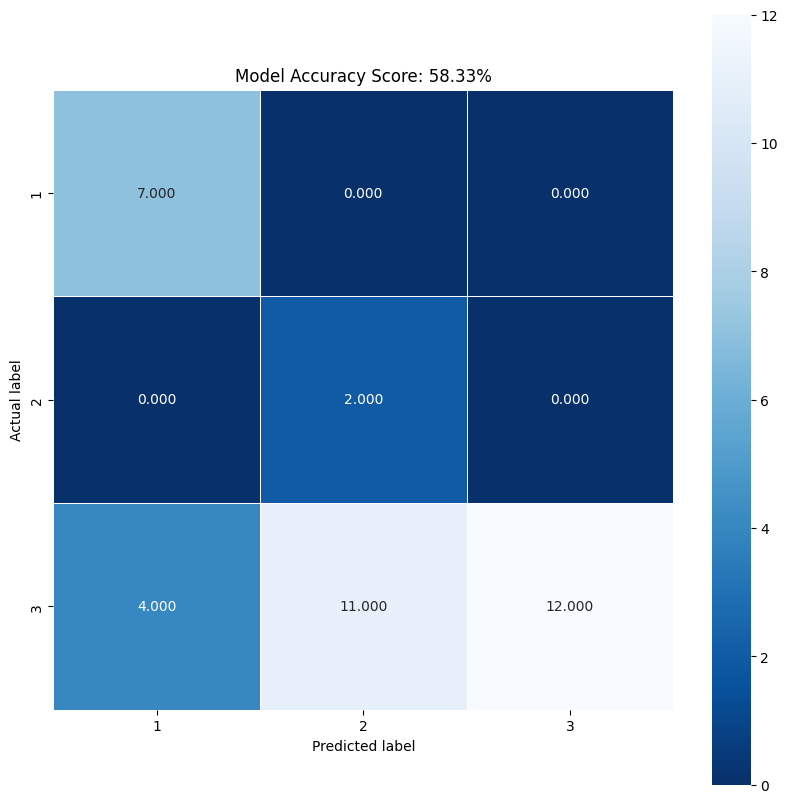

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels = y.unique(), xticklabels = y.unique())
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Model Accuracy Score: {accurance:.2%}'
plt.title(all_sample_title)

In [ ]:
print(classification_report(y_test, predictions, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       1.00      0.64      0.78        11
           2       1.00      0.15      0.27        13
           3       0.44      1.00      0.62        12

    accuracy                           0.58        36
   macro avg       0.81      0.60      0.55        36
weighted avg       0.81      0.58      0.54        36



## Testing for 5 near neighbors on testing data

## Testing algorithm for diferent number of neighbours

In [ ]:
accurance_for_knn = []

for k in range(1, 21):
  predictions = multiple_predict(X_test.to_numpy(), k)
  accurance = np.sum(predictions == y_test.values) / len(y_test.values)
  print(f"Accurance for {k} neighbours: {accurance:.2%}")
  accurance_for_knn.append(accurance)

Accurance for 1 neighbours: 58.33%
Accurance for 2 neighbours: 58.33%
Accurance for 3 neighbours: 52.78%
Accurance for 4 neighbours: 52.78%
Accurance for 5 neighbours: 52.78%
Accurance for 6 neighbours: 52.78%
Accurance for 7 neighbours: 52.78%
Accurance for 8 neighbours: 55.56%
Accurance for 9 neighbours: 58.33%
Accurance for 10 neighbours: 58.33%
Accurance for 11 neighbours: 58.33%
Accurance for 12 neighbours: 61.11%
Accurance for 13 neighbours: 58.33%
Accurance for 14 neighbours: 58.33%
Accurance for 15 neighbours: 58.33%
Accurance for 16 neighbours: 58.33%
Accurance for 17 neighbours: 58.33%
Accurance for 18 neighbours: 58.33%
Accurance for 19 neighbours: 58.33%
Accurance for 20 neighbours: 61.11%


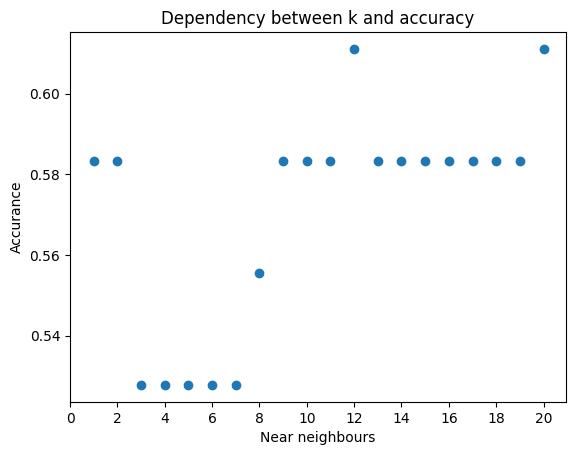

In [ ]:
plt.figsize=(10,15)
plt.scatter(range(1,21,1), accurance_for_knn)
plt.ylabel('Accurance')
plt.xlabel('Near neighbours')
plt.xticks(range(0, 22, 2))
plt.title("Dependency between k and accuracy")
plt.show()